In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Preco,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,Distrito_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,geometry
0,0,0,30365582,400.0,50,0,sem elevador,AVEIRO,8.0,40.837436,...,39,40.640496,-8.653784,"Aveiro, Portugal",218.6,56.6,18,31.0,4,POINT (40.8374358 -8.6551784)


# Regressão Linear 

In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer

In [5]:
# Separando as colunas em numéricas e categóricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()


In [6]:
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove('Id_do_imovel')
object_cols.remove('Endereco_Municipio')
object_cols.remove('geometry')

In [7]:
# Vamos assegurar que 'Preco' está na lista de colunas numéricas
if 'Preco' not in numeric_cols:
    raise ValueError("'Preco' não encontrado nas colunas numéricas. Verifique os dados e tente novamente.")
    
numeric_cols.remove('Preco')  # Removendo a coluna 'Preco' dos dados de entrada
numeric_cols.remove('Preco_por_metro_quadrado') # Removendo a coluna 'Preco_por_metro_quadrado' dos dados de entrada

In [8]:
# Separamos o dataframe em features (X) e target (y)
X = df_final[numeric_cols + object_cols]
y = df_final['Preco']

In [9]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Pipeline para as colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=numeric_cols, imputation_method='median')),
    ('numeric_scaler', SklearnTransformerWrapper(variables=numeric_cols, transformer=StandardScaler())),])


In [11]:
object_cols

['Indicador_de_Elevador',
 'Distrito_do_imovel',
 'Tipo_de_Certificacao_Energetica',
 'Nome_Regiao',
 'Nome_Cidade']

In [12]:
# Pipeline para as colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])


In [13]:
# Juntando as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, object_cols)])

In [14]:
# Criando o modelo de regressão linear
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [15]:
# Treinando o modelo com o conjunto de treino
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   MeanMedianImputer(variables=['Valor_Area_util_do_imovel',
                                                                                                'Numero_Andar_do_imovel',
                                                                                                'Latitude_imovel',
                                                                                                'Longitude_imovel',
                                                                                                'Tipo_de_Construcao',
                                                                                                'Numero_de_Banheiros',
                                                                                                'Possui_Jardim',
                                                                                                'Possui_Elevador',
                                                                                                'Possui_Estacionamento',
                                                                                                'Possui_Piscina',
                                                                                                'Possui...
                                                   'Quantidade_Escolas_Pre-Escolar_(4-6_anos)',
                                                   'Quantidade_Escolas_Ciclo_1_(6-10_anos)', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Indicador_de_Elevador',
                                                   'Distrito_do_imovel',
                                                   'Tipo_de_Certificacao_Energetica',
                                                   'Nome_Regiao',
                                                   'Nome_Cidade'])])),
                ('regressor', LinearRegression())])

In [16]:
# Predizendo os valores para o conjunto de teste
y_pred = model.predict(X_test)

In [17]:
# Calculando e imprimindo as métricas
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): ', r2_score(y_test, y_pred))


Mean squared error:  53373.84957961114
Coefficient of determination (R^2):  0.6604196633883896


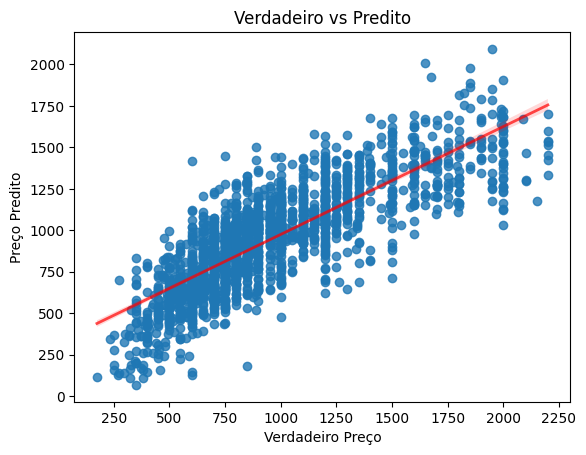

In [18]:
# Plotando o gráfico
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Verdadeiro Preço')
plt.ylabel('Preço Predito')
plt.title('Verdadeiro vs Predito')
plt.show()

In [19]:
# Obtendo os coeficientes da regressão linear
linear_regressor = model.named_steps['regressor']
coef = linear_regressor.coef_
intercept = linear_regressor.intercept_

In [20]:
intercept

366112013177963.7

In [21]:
coef

array([ 1.30159522e+02,  2.20762953e+00, -3.69686664e+02, -3.93154744e+01,
       -2.38562876e-02,  7.79064965e+01,  1.18987143e+01,  8.42417239e+01,
        2.72847810e+01,  2.23504655e+01, -1.07731138e+01,  3.54470042e+01,
        9.07309807e+00,  2.68748915e+01,  3.93488462e+00,  4.23347484e+12,
        5.97238677e+01,  4.28968577e+13, -5.00519328e+13, -1.74691673e+14,
       -1.28354444e+14,  8.64056606e+12,  8.03219336e+13, -2.84114758e+14,
        6.26134384e+13, -3.74240943e+14, -1.23166752e+14, -1.29751460e+14,
        2.24435908e+14, -1.68437293e+13,  2.71132013e+14,  6.73745262e+14,
        5.15019965e+14, -3.46530333e+13,  2.48995610e+14,  9.19600026e+13,
       -6.18000690e+14,  2.56804446e+13, -1.02972414e+14, -8.04986702e+12,
       -6.48051250e+13,  1.77516575e+13,  1.06791478e+14, -6.55402154e+13,
        8.47009585e+13, -4.68710560e+13, -8.50473735e+12, -8.50473735e+12,
       -8.50473735e+12,  2.17539704e+13, -2.08609453e+13,  6.25805243e+13,
       -5.27541215e+13,  

In [22]:
# Obtendo os nomes das colunas após o one-hot encoding
one_hot_columns = list(model.named_steps['preprocessor'].
                       named_transformers_['cat'].
                       named_steps['one_hot_encoder'].
                       get_feature_names_out(object_cols))

In [23]:
# Criando uma lista com todos os nomes das colunas
all_columns = numeric_cols + one_hot_columns

# Imprimindo a equação da regressão
equation = "Preco = " + str(intercept)
for i in range(len(coef)):
    equation += " + " + str(coef[i]) + "*" + all_columns[i]

print("A equação da regressão é:")
print(equation)

A equação da regressão é:
Preco = 366112013177963.7 + 130.15952165450275*Valor_Area_util_do_imovel + 2.2076295264641175*Numero_Andar_do_imovel + -369.68666358233463*Latitude_imovel + -39.315474427964*Longitude_imovel + -0.023856287636151663*Tipo_de_Construcao + 77.90649647145771*Numero_de_Banheiros + 11.898714317269047*Possui_Jardim + 84.24172394516819*Possui_Elevador + 27.28478099927831*Possui_Estacionamento + 22.35046554036576*Possui_Piscina + -10.773113779459564*Possui_Terraco + 35.4470042395137*Numero_de_Quartos + 9.073098068811952*Indicador_Anuncio_possui_planta_baixa + 26.874891496526367*Numero_de_fotos_do_anuncio + 3.9348846187485513*Numero_de_videos_do_anuncio + 4233474842849.3086*Tipo_de_Operacao + 59.7238677251183*Tipo_de_proprietario + 42896857723644.08*Numero_Faixa_Etaria_0-14 + -50051932767475.03*Numero_Faixa_Etaria_15-64 + -174691672810235.7*Numero_Faixa_Etaria_>65 + -128354444101661.78*Percentual_Faixa_Etaria_0-14 + 8640566064539.876*Percentual_Faixa_Etaria_15-64 + 80321

In [24]:

# Obtendo os coeficientes da regressão linear e ordenando em ordem decrescente
coef = linear_regressor.coef_
sorted_indices = np.argsort(np.abs(coef))[::-1]

print("As 10 características mais importantes são:")
for i in range(20):
    print(f"{all_columns[sorted_indices[i]]}: {coef[sorted_indices[i]]}")


As 10 características mais importantes são:
Quantidade_Escolas_Ciclo_3_(13-15_anos): 673745262230734.5
Percentual_Poder_de_Compra: -618000690195020.1
Nome_Cidade_LISBOA: -544634724601814.3
Quantidade_Shows_Exibicoes_Teatro: 515019965113204.7
Distrito_do_imovel_LISBOA: -401863146468685.8
Quantidade_Hospitais_(Particulares_e_Publicos): -374240942792970.6
Densidade_populacional_por_Km: -284114758153460.56
Quantidade_Escolas_Ciclo_2_(10-12_anos): 271132013245256.88
Renda_Media_Mensal: 248995610397687.62
Quantidade_Escolas_Pre-Escolar_(4-6_anos): 224435907764688.06
Numero_Faixa_Etaria_>65: -174691672810235.7
Nome_Regiao_Area Metropolitana de Lisboa: 168783285456631.34
Quantidade_Construcoes_Novas: -129751459731591.44
Percentual_Faixa_Etaria_0-14: -128354444101661.78
Quantidade_Farmacias: -123166751985696.56
Nome_Cidade_SETUBAL: 122867277372459.22
Distancia_dirigindo_de_Porto_Portugal: 106791478377708.78
Quantidade_Bancos: -102972414449585.23
Nome_Cidade_COIMBRA: 96031242160397.97
Distrito_d

## Árvore de Decisão

In [117]:
## Árvore de Decisãotree_model_pipe.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper


# Pipeline

tree_model = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=numeric_cols, arbitrary_number=-999)),  
                ('categoric_imputer', CategoricalImputer(variables=object_cols, fill_value='missing')), 
                ('one_hot_encoder', OneHotEncoder(variables=object_cols)),
                ('algoritmo', DecisionTreeClassifier(random_state=42))
])

In [118]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(estimator=tree_model, X=X_train, y=y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=skf, n_jobs=-1)
tree_model_results = pd.DataFrame(cv_results)
tree_model_results
     

C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.210767,0.042091,0.100225,NaN,NaN,NaN,NaN
1,0.201248,0.041068,0.117117,NaN,NaN,NaN,NaN
2,0.252262,0.046078,0.105856,NaN,NaN,NaN,NaN
3,0.225213,0.049085,0.112740,NaN,NaN,NaN,NaN
4,0.229212,0.041078,0.102593,NaN,NaN,NaN,NaN


In [119]:
# criando uma tabela vazia que irá conter os resultados dos modelos
df_metrics = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [],'roc_auc': []}
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc


In [120]:
accuracy = tree_model_results.mean().loc['test_accuracy']
precision = tree_model_results.mean().loc['test_precision']
recall = tree_model_results.mean().loc['test_recall']
f1 = tree_model_results.mean().loc['test_f1']
roc_auc = tree_model_results.mean().loc['test_roc_auc']

In [121]:
df_metrics['model'].append('Decision Tree')
df_metrics['accuracy'].append(accuracy)
df_metrics['precision'].append(precision)
df_metrics['recall'].append(recall)
df_metrics['f1'].append(f1)
df_metrics['roc_auc'].append(roc_auc)

In [122]:
pd.DataFrame(df_metrics)

,model,accuracy,precision,recall,f1,roc_auc
0,Decision Tree,0.107706,NaN,NaN,NaN,NaN


In [123]:
# Treinamento
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   ArbitraryNumberImputer(arbitrary_number=-999,
                                                                                          variables=['Valor_Area_util_do_imovel',
                                                                                                     'Numero_Andar_do_imovel',
                                                                                                     'Latitude_imovel',
                                                                                                     'Longitude_imovel',
                                                                                                     'Tipo_de_Construcao',
                                                                                                     'Numero_de_Banheiros',
                                                                                                     'Possui_Jardim',
                                                                                                     'Possui_Elevador',
                                                                                                     'Possui_Estacionament...
                                                                                                 'Nome_Regiao',
                                                                                                 'Nome_Cidade'])),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(variables=['Indicador_de_Elevador',
                                                                                            'Distrito_do_imovel',
                                                                                            'Tipo_de_Certificacao_Energetica',
                                                                                            'Nome_Regiao',
                                                                                            'Nome_Cidade']))]),
                                                  ['Indicador_de_Elevador',
                                                   'Distrito_do_imovel',
                                                   'Tipo_de_Certificacao_Energetica',
                                                   'Nome_Regiao',
                                                   'Nome_Cidade'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [124]:
# Calculando e exibindo a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.1114


In [125]:
# Obtendo os nomes das features após o OneHotEncoder
onehot_columns = model.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['one_hot_encoder'].get_feature_names_out(object_cols)


In [126]:
features_after_encoding = np.array(numeric_cols + list(onehot_columns))


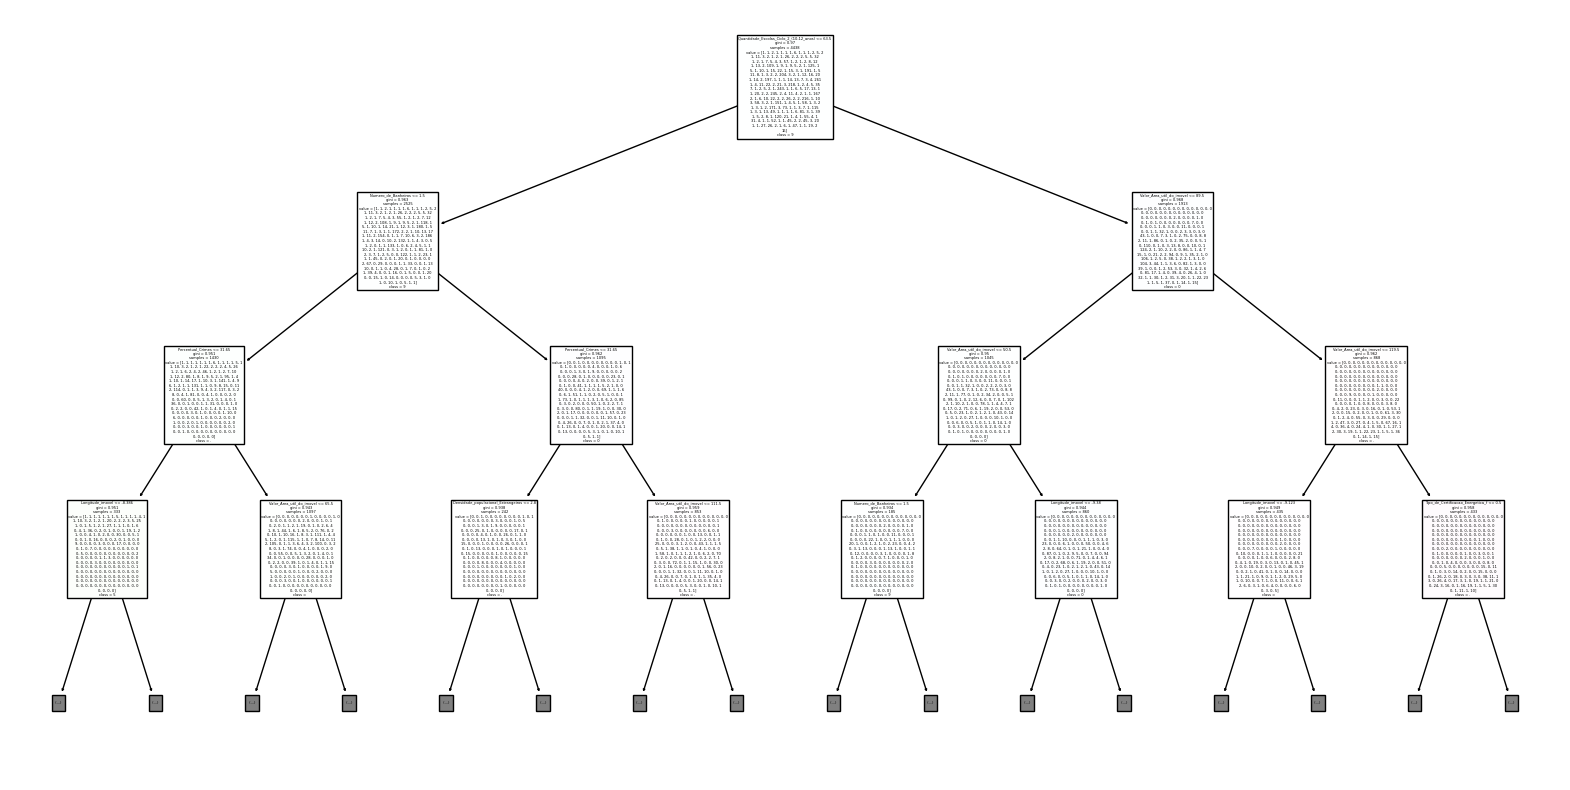

In [127]:
# Exibindo a Árvore de Decisão
plt.figure(figsize=(20, 10))
plot_tree(model.named_steps['classifier'], filled=True, feature_names=features_after_encoding, class_names=str(y.unique()), max_depth=3)
plt.show()


In [128]:
# Avaliando o modelo na base de treino e teste

from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test  = accuracy_score(y_test, y_pred_test)

print(f"Acc de Treino: {acc_train}")
print(f"Acc de Teste: {acc_test}")

Acc de Treino: 1.0
Acc de Teste: 0.1187598528638991
